## Vertex functions

This code calculates the vertex functions from random-phase-approximation
of copolymer melts.

In [1]:
from CORRcalc import s2wlc, s2inverse, s3wlc, s4wlc, norm
from itertools import product
import propagator 
import numpy as np
from scipy import optimize

In [2]:
%matplotlib inline
import mpld3
import matplotlib.pyplot as plt
mpld3.enable_notebook()

In [3]:
def r2(N):
    return N - 0.5*(1-np.exp(-2*N))

In [4]:
def spinodal(N, FA):
    CHI = 0
    K0 = 1/np.sqrt(r2(N))
    
    KS = optimize.fmin(lambda K: np.real(gamma2(pset, N, FA, K, CHI)), K0,\
                      disp=False)
    
    return KS

## Quadratic vertex

In [5]:
def gamma2(pset, N, FA, K, CHI):
    s2inv = s2inverse(pset, N, FA, K)

    D = [1,-1]    # sign indicator
    G = 0
    for I0, I1 in product([0,1], repeat=2):
        G += s2inv[I0, I1]*D[I0]*D[I1]
        
    return -2*CHI + N*G

In [6]:
N=10
FA=0.5

nlam=4
pset=propagator.prop_set(nlam=nlam)

K = 10
CHI = 0

KV = np.logspace(-1,3,100)
gam2 = np.zeros((len(KV), 1),dtype=type(1+1j))

for i, K in enumerate(KV):
    gam2[i] = gamma2(pset, N, FA, K, CHI)

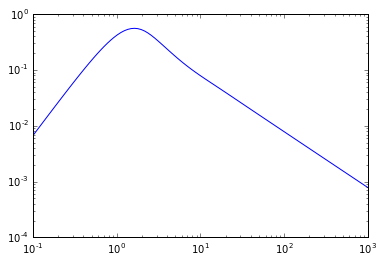

In [7]:
plt.loglog(KV, 1/gam2.real)
plt.show()

In [8]:
# N = 10
# FAV = np.linspace(.1, .9, 10)
FA = 0.5
NV = np.logspace(-1, 4, 10)
KSV = np.zeros((len(NV)))

for ind, N in enumerate(NV):
    KSV[ind] = spinodal(N, FA)

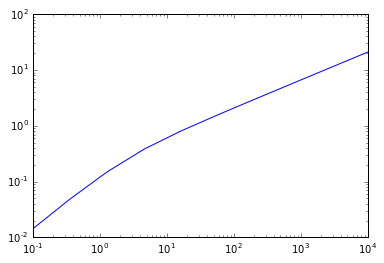

In [9]:
plt.loglog(NV, 1/KSV)
plt.show()

## Cubic Vertex

In [10]:
def gamma3(pset, N, FA, Ks):
    K1, K2, K3 = Ks
    if norm(K1+K2+K3) >= 1e-10:
        raise('Qs must add up to zero')
        
    if not (abs(norm(K1)-norm(K2)) < 1e-5 \
        and abs(norm(K2)-norm(K3)) < 1e-5):
        raise('Qs must have same length')
    
    s3 = s3wlc(pset, N, FA, Ks)
    s2inv = s2inverse(pset, N, FA, norm(K1))
    
    val = 0
    for I0, I1, I2 in product([0,1], repeat=3):
        val -= s3[I0][I1][I2]* (s2inv[I0][0] - s2inv[I0][1])*\
                               (s2inv[I1][0] - s2inv[I1][1])*\
                               (s2inv[I2][0] - s2inv[I2][1])

    return val*(N**2)

(10, 0.20000000000000001)
(10, 0.21500000000000002)
(10, 0.23000000000000001)
(10, 0.245)
(10, 0.26000000000000001)
(10, 0.27500000000000002)
(10, 0.29000000000000004)
(10, 0.30499999999999999)
(10, 0.32000000000000001)
(10, 0.33500000000000002)
(10, 0.34999999999999998)
(10, 0.36499999999999999)
(10, 0.38)
(10, 0.39500000000000002)
(10, 0.41000000000000003)
(10, 0.42499999999999999)
(10, 0.44)
(10, 0.45500000000000002)
(10, 0.47000000000000003)
(10, 0.48499999999999999)
(10, 0.5)
(100, 0.20000000000000001)
(100, 0.21500000000000002)
(100, 0.23000000000000001)
(100, 0.245)
(100, 0.26000000000000001)
(100, 0.27500000000000002)
(100, 0.29000000000000004)
(100, 0.30499999999999999)
(100, 0.32000000000000001)
(100, 0.33500000000000002)
(100, 0.34999999999999998)
(100, 0.36499999999999999)
(100, 0.38)
(100, 0.39500000000000002)
(100, 0.41000000000000003)
(100, 0.42499999999999999)
(100, 0.44)
(100, 0.45500000000000002)
(100, 0.47000000000000003)
(100, 0.48499999999999999)
(100, 0.5)


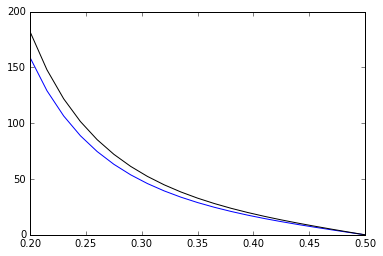

In [11]:
# N = 10
for N in [10, 100]:

    nlam = 20
    pset=propagator.prop_set(nlam=nlam)

    FAV = np.linspace(.2, .5, 21)
    GAM3 = np.zeros((len(FAV)), dtype='complex')
    KSV = np.zeros((len(FAV)))

    def set3Ks(K):
        k1 = np.array([1,0,0])*K
        k2 = np.array([-0.5,0.5*np.sqrt(3),0])*K
        k3 = -k1-k2

        Ks = [k1, k2, k3]
        return Ks

    for ind, FA in enumerate(FAV):
        print(N, FA)
        KS = spinodal(N, FA)
        Ks = set3Ks(KS)

        KSV[ind] = KS
        GAM3[ind] = gamma3(pset, N, FA, Ks)
    
    if N == 10:
        plt.plot(FAV, -np.real(N*GAM3), color='blue')
    else:
        plt.plot(FAV, -np.real(N*GAM3), color='black')
plt.axis([.2,.5,0,200])
plt.show()

## Quartic Vertex

In [14]:
def gamma4(pset, N, FA, Ks):
    K1, K2, K3, K4 = Ks
    if not (norm(K1) == norm(K2) == norm(K3) == norm(K4)):
        raise('Qs must have same length')
    
    K = norm(K1)
    K12 = norm(K1+K2)
    K13 = norm(K1+K3)
    K14 = norm(K1+K4)
    
    s4 = s4wlc(pset, N, FA, Ks)
    s31 = s3wlc(pset, N, FA, [K1, K2, -K1-K2])
    s32 = s3wlc(pset, N, FA, [K1, K3, -K1-K3])
    s33 = s3wlc(pset, N, FA, [K1, K4, -K1-K4])
    
    s2inv = s2inverse(pset, N, FA, K)
    s21inv = s2inverse(pset, N, FA, K12)
    s22inv = s2inverse(pset, N, FA, K13)
    s23inv = s2inverse(pset, N, FA, K14)
    
    G4 = np.zeros((2,2,2,2),dtype=type(1+1j))
    for a1, a2, a3, a4 in product([0,1], repeat=4):
        for I0, I1 in product([0,1], repeat=2):
            G4[a1][a2][a3][a4] += \
                s31[a1][a2][I0]*s31[a3][a4][I1]*s21inv[I0][I1] + \
                s32[a1][a2][I0]*s32[a3][a4][I1]*s22inv[I0][I1] + \
                s33[a1][a2][I0]*s33[a3][a4][I1]*s23inv[I0][I1]
    G4 -= s4
    
    val = 0
    for I0, I1, I2, I3 in product([0,1], repeat=4):
        val += G4[I0][I1][I2][I3] *\
                (s2inv[I0][0] - s2inv[I0][1])*\
                (s2inv[I1][0] - s2inv[I1][1])*\
                (s2inv[I2][0] - s2inv[I2][1])*\
                (s2inv[I3][0] - s2inv[I3][1])
                
    return val*(N**3)

In [23]:
N = 100

nlam = 4
pset=propagator.prop_set(nlam=nlam)

FAV = np.linspace(.3, .5, 21)
GAM4 = np.zeros((len(FAV)), dtype='complex')
KSV = np.zeros((len(FAV)))

def set4Ks(K):
    k1=np.array([0,0,1])*K
    k2=np.array([0,0,1])*K
    k3=-k1
    k4=-k2

    k = [k1, k2, k3, k4]
    return k

for ind, FA in enumerate(FAV):
    print(N, FA)
    KS = spinodal(N, FA)
    Ks = set4Ks(KS)

    KSV[ind] = KS
    GAM4[ind] = gamma4(pset, N, FA, Ks)
    
print(GAM4)

(100, 0.29999999999999999)
(100, 0.31)
(100, 0.32000000000000001)
(100, 0.32999999999999996)
(100, 0.33999999999999997)
(100, 0.34999999999999998)
(100, 0.35999999999999999)
(100, 0.37)
(100, 0.38)
(100, 0.39000000000000001)
(100, 0.40000000000000002)
(100, 0.40999999999999998)
(100, 0.41999999999999998)
(100, 0.42999999999999999)
(100, 0.44)
(100, 0.44999999999999996)
(100, 0.45999999999999996)
(100, 0.46999999999999997)
(100, 0.47999999999999998)
(100, 0.48999999999999999)
(100, 0.5)
[ 6.57422322 +8.01375699e-14j  5.92935265 +6.68164783e-14j
  5.37516364 +5.61586900e-14j  4.89770766 +4.74934262e-14j
  4.48508226 +4.04030442e-14j  4.12699772 +3.46218260e-14j
  3.81556483 +2.98821977e-14j  3.54483560 +2.59375856e-14j
  3.30885345 +2.26791613e-14j  3.10316300 +1.99802488e-14j
  2.92456958 +1.77130751e-14j  2.76895054 +1.58592437e-14j
  2.63475024 +1.43019308e-14j  2.51882783 +1.30408932e-14j
  2.42039550 +1.19922663e-14j  2.33701367 +1.11666190e-14j
  2.26846234 +1.05016788e-14j  2.2133

In [28]:
mpld3.disable_notebook()

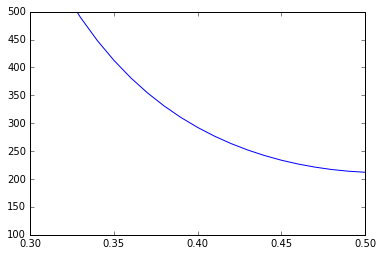

In [29]:
plt.plot(FAV, GAM4*N)
plt.axis([.3,.5,100,500])
plt.box
plt.show()